In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm,poisson,binom,expon,geom

# **Problem Statement**
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female)

In [3]:
df=pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


# **1. Identification of variables**

In [4]:
df.shape

(550068, 10)

In [5]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [7]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


# **2. Analysing basic metrics**

In [8]:
round(df.describe(include='all'),2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,550068.00,550068,550068,550068,550068.00,550068,550068,550068.00,550068.00,550068.00
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1003028.84,NaN,NaN,NaN,8.08,NaN,NaN,0.41,5.40,9263.97
std,1727.59,NaN,NaN,NaN,6.52,NaN,NaN,0.49,3.94,5023.07
min,1000001.00,NaN,NaN,NaN,0.00,NaN,NaN,0.00,1.00,12.00
25%,1001516.00,NaN,NaN,NaN,2.00,NaN,NaN,0.00,1.00,5823.00
50%,1003077.00,NaN,NaN,NaN,7.00,NaN,NaN,0.00,5.00,8047.00
75%,1004478.00,NaN,NaN,NaN,14.00,NaN,NaN,1.00,8.00,12054.00


In [9]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [10]:
df.nunique()

,0
User_ID,5891
Product_ID,3631
Gender,2
Age,7
Occupation,21
City_Category,3
Stay_In_Current_City_Years,5
Marital_Status,2
Product_Category,20
Purchase,18105


* We can observe that there are no null values
* Mean > Median,suggesting a right-skewed distribution — i.e., some customers spent significantly more, which may be outliers.
* Since the difference between mean and median is ~₹1,200, we likely have positive outliers (high spenders).

# **3. Non Graphical Analysis**

In [11]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [12]:
from IPython.display import display

for col in df.columns:
    display(df[col].value_counts())

,count
User_ID,
1001680,1026
1004277,979
1001941,898
1001181,862
1000889,823
...,...
1004991,7
1005391,7
1000094,7


,count
Product_ID,
P00265242,1880
P00025442,1615
P00110742,1612
P00112142,1562
P00057642,1470
...,...
P00325342,1
P00312542,1
P00008942,1


,count
Gender,
M,414259
F,135809


,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


,count
Occupation,
4,72308
0,69638
7,59133
1,47426
17,40043
20,33562
12,31179
14,27309
2,26588


,count
City_Category,
B,231173
C,171175
A,147720


,count
Stay_In_Current_City_Years,
1,193821
2,101838
3,95285
4+,84726
0,74398


,count
Marital_Status,
0,324731
1,225337


,count
Product_Category,
5,150933
1,140378
8,113925
11,24287
2,23864
6,20466
3,20213
4,11753
16,9828


,count
Purchase,
7011,191
7193,188
6855,187
6891,184
6960,183
...,...
18913,1
14361,1
5572,1


In [13]:
cat_columns=df[['Age','Gender','City_Category','Marital_Status']]
for col in cat_columns:
  display(pd.crosstab(index=df['Product_ID'],columns=df[col],margins=True))

Age,0-17,18-25,26-35,36-45,46-50,51-55,55+,All
Product_ID,,,,,,,,
P00000142,55,259,445,228,83,57,25,1152
P00000242,19,88,131,79,26,26,7,376
P00000342,11,48,95,37,15,23,15,244
P00000442,2,18,46,17,4,3,2,92
P00000542,9,33,56,33,8,9,1,149
...,...,...,...,...,...,...,...,...
P0099642,0,2,6,3,0,1,1,13
P0099742,15,32,41,27,10,1,0,126
P0099842,1,13,23,26,16,14,9,102


Gender,F,M,All
Product_ID,,,
P00000142,347,805,1152
P00000242,91,285,376
P00000342,69,175,244
P00000442,46,46,92
P00000542,50,99,149
...,...,...,...
P0099642,4,9,13
P0099742,44,82,126
P0099842,51,51,102


City_Category,A,B,C,All
Product_ID,,,,
P00000142,255,435,462,1152
P00000242,83,181,112,376
P00000342,64,102,78,244
P00000442,36,38,18,92
P00000542,44,70,35,149
...,...,...,...,...
P0099642,4,6,3,13
P0099742,34,51,41,126
P0099842,19,50,33,102


Marital_Status,0,1,All
Product_ID,,,
P00000142,717,435,1152
P00000242,236,140,376
P00000342,147,97,244
P00000442,54,38,92
P00000542,103,46,149
...,...,...,...
P0099642,8,5,13
P0099742,81,45,126
P0099842,58,44,102


In [14]:
#Tracking the amount spent per transaction of all the female and male customers,
round(df.groupby('Gender')['Purchase'].aggregate(['count','mean']),2).rename(columns={'count':'Total_transactions','mean':'avg_amount_spent_per_transaction'})

,Total_transactions,avg_amount_spent_per_transaction
Gender,,
F,135809,8734.57
M,414259,9437.53


* Men spend more per transaction on average than women in this sample.

* There are also more male transactions in the dataset

In [15]:
#Use the sample average to find out an interval within which the population average will lie.
#Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

sample=df[df['Gender']=='F']['Purchase'].dropna()
#basic statistics
x=sample.mean()
s=sample.std(ddof=1)
n=len(sample)

#confidence interval of 95%
z=round(norm.ppf(0.975),2)

## Compute margin of error
margin_of_error = z * (s / np.sqrt(n))

#confidence interval
lower_bound = x - margin_of_error
upper_bound = x+ margin_of_error

print(f"Confidence Interval of female: ({lower_bound:.2f}, {upper_bound:.2f})")

Confidence Interval of female: (8709.21, 8759.92)


In [16]:
sample=df[df['Gender']=='M']['Purchase'].dropna()
#basic statistics
x=sample.mean()
s=sample.std(ddof=1)
n=len(sample)

#confidence interval of 95%
z=round(norm.ppf(0.975),2)

## Compute margin of error
margin_of_error = z * (s / np.sqrt(n))

#confidence interval
lower_bound = x - margin_of_error
upper_bound = x+ margin_of_error

print(f"Confidence Interval of male: ({lower_bound:.2f}, {upper_bound:.2f})")

Confidence Interval of male: (9422.02, 9453.03)


In [17]:
# exploring how sample size and confidence level (width of interval) affect the Confidence Interval (CI) for the mean expenses of female and male customers.
def Compute_CI(sample,confidence):
  sample=sample.dropna()
  #basic statistics
  x=sample.mean()
  s=sample.std(ddof=1)
  n=len(sample)
  z=norm.ppf(1-(1-confidence)/2)
  margin=z*(s/np.sqrt(n))
  lower_bound=x-margin
  upper_bound=x+margin
  width=margin*2
  return round(lower_bound,2),round(upper_bound,2),round(width,2)

female_sample = df[df['Gender'] == 'F']['Purchase']
male_sample = df[df['Gender'] == 'M']['Purchase']

# Confidence levels to test
confidence_levels = [0.90, 0.95, 0.99]

print("Female Customers")
for c in confidence_levels:
  lower_bound_female, upper_bound_female, width_female = Compute_CI(female_sample,c)
  print(f" {int(c*100)}% CI: ({lower_bound_female:.2f}, {upper_bound_female:.2f}) | Width: {width_female:.2f}")

print("Male Customers")
for c in confidence_levels:
  lower_bound_male, upper_bound_male, width_male = Compute_CI(male_sample,c)
  print(f" {int(c*100)}% CI: ({lower_bound_male:.2f}, {upper_bound_male:.2f}) | Width: {width_male:.2f}")

Female Customers
 90% CI: (8713.29, 8755.84) | Width: 42.56
 95% CI: (8709.21, 8759.92) | Width: 50.71
 99% CI: (8701.24, 8767.89) | Width: 66.64
Male Customers
 90% CI: (9424.51, 9450.54) | Width: 26.03
 95% CI: (9422.02, 9453.03) | Width: 31.01
 99% CI: (9417.15, 9457.91) | Width: 40.76


* The upper bound of female average spending (₹8759.92) is much lower than the lower bound of male average spending (₹9422.02).

* Conclusion: The difference in average spending between male and female customers is statistically significant — not due to random chance.

* So, there is no overlapping

* Male customers consistently spend more per transaction than female customers.

* Female customers show more variability in their spending, but their average remains significantly lower.

In [18]:
# exploring how sample size and confidence level (width of interval) affect the Confidence Interval (CI) for the mean expenses of unmarried and married customers.
def Compute_CI(sample,confidence):
  sample=sample.dropna()
  #basic statistics
  x=sample.mean()
  s=sample.std(ddof=1)
  n=len(sample)
  z=norm.ppf(1-(1-confidence)/2)
  margin=z*(s/np.sqrt(n))
  lower_bound=x-margin
  upper_bound=x+margin
  width=margin*2
  return round(lower_bound,2),round(upper_bound,2),round(width,2)


Unmarried = df[df['Marital_Status'] == 0]['Purchase'].dropna()
Married = df[df['Marital_Status'] == 1]['Purchase'].dropna()

# Confidence levels to test
confidence_levels = [0.90, 0.95, 0.99]

print("Unmarried Customers")
for c in confidence_levels:
  lower_bound_Unmarried, upper_bound_Unmarried, width_Unmarried = Compute_CI(Unmarried,c)
  print(f" {int(c*100)}% CI: ({lower_bound_Unmarried:.2f}, {upper_bound_Unmarried:.2f}) | Width: {width_Unmarried:.2f}")

print("Married Customers")
for c in confidence_levels:
  lower_bound_Married, upper_bound_Married, width_Married = Compute_CI(Married,c)
  print(f" {int(c*100)}% CI: ({lower_bound_Married:.2f}, {upper_bound_Married:.2f}) | Width: {width_Married:.2f}")

Unmarried Customers
 90% CI: (9251.40, 9280.42) | Width: 29.02
 95% CI: (9248.62, 9283.20) | Width: 34.58
 99% CI: (9243.18, 9288.63) | Width: 45.45
Married Customers
 90% CI: (9243.79, 9278.56) | Width: 34.77
 95% CI: (9240.46, 9281.89) | Width: 41.43
 99% CI: (9233.95, 9288.40) | Width: 54.45


* Based on confidence intervals, there is no statistically significant difference in average Black Friday spending between married and unmarried customers. Both groups display similar average transaction behavior.

* We can also conclude this using t-test as below

In [19]:
from scipy.stats import ttest_ind


unmarried = df[df['Marital_Status'] == 0]['Purchase'].dropna()
married = df[df['Marital_Status'] == 1]['Purchase'].dropna()


t_stat, p_value = ttest_ind(unmarried, married, equal_var=False)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Decision rule at 0.05 significance level
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in average spending.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average spending.")


T-statistic: 0.3438
P-value: 0.7310
Fail to reject the null hypothesis: No significant difference in average spending.


In [20]:
#For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.
# exploring how sample size and confidence level (width of interval) affect the Confidence Interval (CI) for the mean expenses of unmarried and married customers.
def Compute_CI(sample,confidence):
  sample=sample.dropna()
  #basic statistics
  x=sample.mean()
  s=sample.std(ddof=1)
  n=len(sample)
  z=norm.ppf(1-(1-confidence)/2)
  margin=z*(s/np.sqrt(n))
  lower_bound=x-margin
  upper_bound=x+margin
  width=margin*2
  return round(lower_bound,2),round(upper_bound,2),round(width,2)


Age_group_1 = df[df['Age'] == '0-17']['Purchase'].dropna()
Age_group_2 = df[df['Age'] == '18-25']['Purchase'].dropna()
Age_group_3=  df[df['Age'] == '26-35']['Purchase'].dropna()
Age_group_4=  df[df['Age'].isin(['36-45','46-50'])]['Purchase'].dropna()
Age_group_5=  df[df['Age'].isin(['51-55','55+'])]['Purchase'].dropna()


# Confidence levels to test
confidence_levels = [0.90, 0.95, 0.99]

print("Age 0-17")
for c in confidence_levels:
  lower_bound_Age_group_1, upper_bound_Age_group_1, width_Age_group_1 = Compute_CI(Age_group_1,c)
  print(f" {int(c*100)}% CI: ({lower_bound_Age_group_1:.2f}, {upper_bound_Age_group_1:.2f}) | Width: {width_Age_group_1:.2f}")

print("Age 18-25")
for c in confidence_levels:
  lower_bound_Age_group_2, upper_bound_Age_group_2, width_Age_group_2 = Compute_CI(Age_group_2,c)
  print(f" {int(c*100)}% CI: ({lower_bound_Age_group_2:.2f}, {upper_bound_Age_group_2:.2f}) | Width: {width_Age_group_2:.2f}")

print("Age 26-35")
for c in confidence_levels:
  lower_bound_Age_group_3, upper_bound_Age_group_3, width_Age_group_3 = Compute_CI(Age_group_3,c)
  print(f" {int(c*100)}% CI: ({lower_bound_Age_group_3:.2f}, {upper_bound_Age_group_3:.2f}) | Width: {width_Age_group_3:.2f}")

print("Age 36-50")
for c in confidence_levels:
  lower_bound_Age_group_4, upper_bound_Age_group_4, width_Age_group_4 = Compute_CI(Age_group_4,c)
  print(f" {int(c*100)}% CI: ({lower_bound_Age_group_4:.2f}, {upper_bound_Age_group_4:.2f}) | Width: {width_Age_group_4:.2f}")

print("Age 51+")
for c in confidence_levels:
  lower_bound_Age_group_5, upper_bound_Age_group_5, width_Age_group_5 = Compute_CI(Age_group_5,c)
  print(f" {int(c*100)}% CI: ({lower_bound_Age_group_5:.2f}, {upper_bound_Age_group_5:.2f}) | Width: {width_Age_group_5:.2f}")


Age 0-17
 90% CI: (8865.05, 9001.88) | Width: 136.82
 95% CI: (8851.95, 9014.98) | Width: 163.03
 99% CI: (8826.33, 9040.60) | Width: 214.26
Age 18-25
 90% CI: (9143.43, 9195.89) | Width: 52.46
 95% CI: (9138.41, 9200.92) | Width: 62.51
 99% CI: (9128.59, 9210.74) | Width: 82.15
Age 26-35
 90% CI: (9235.10, 9270.28) | Width: 35.18
 95% CI: (9231.73, 9273.65) | Width: 41.91
 99% CI: (9225.15, 9280.23) | Width: 55.08
Age 36-50
 90% CI: (9274.46, 9316.20) | Width: 41.74
 95% CI: (9270.46, 9320.20) | Width: 49.74
 99% CI: (9262.65, 9328.01) | Width: 65.37
Age 51+
 90% CI: (9429.68, 9497.65) | Width: 67.97
 95% CI: (9423.17, 9504.16) | Width: 80.99
 99% CI: (9410.44, 9516.88) | Width: 106.44


# **4.Graphical Analysis**

(a) Univariate Analysis

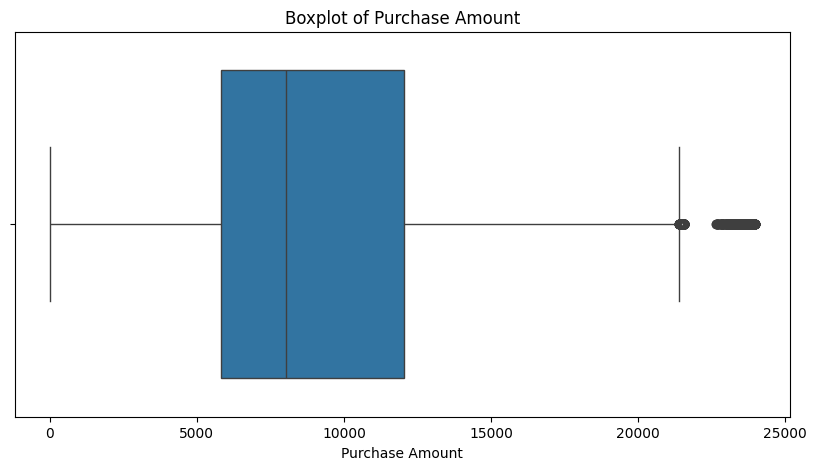

In [21]:
#Outliers detetction using boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Purchase"])
plt.title("Boxplot of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.show()

* The plot shows several outliers on the right side (high-value purchases).

* This confirms the earlier observation of right-skewed data.

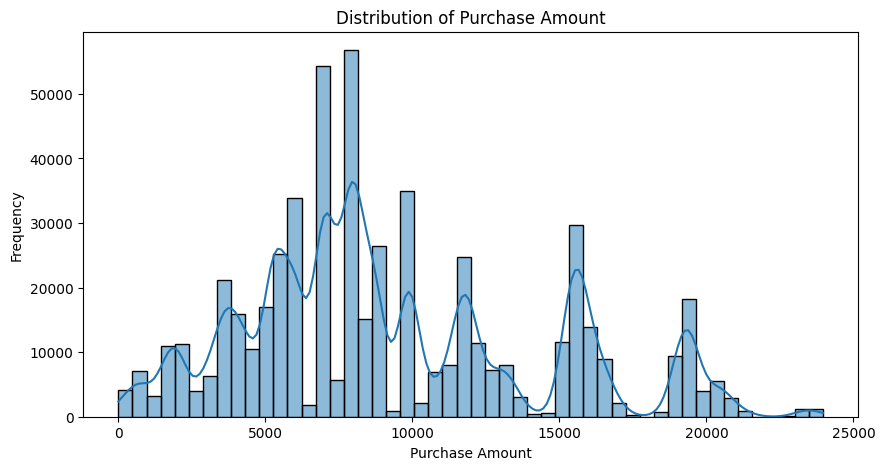

In [22]:
#Distibution of purcahse amaount
plt.figure(figsize=(10, 5))
sns.histplot(df["Purchase"], bins=50, kde=True)
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

* Most transactions fall between ₹5,000 and ₹12,000.

* The kde (Kernel Density Estimate) shows a peak near ₹8,000.

* There is a long tail on the right, indicating a small number of large purchases.

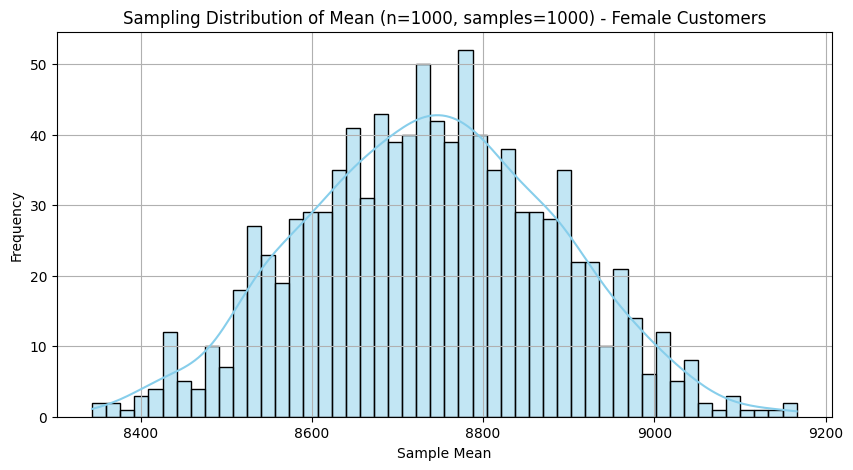

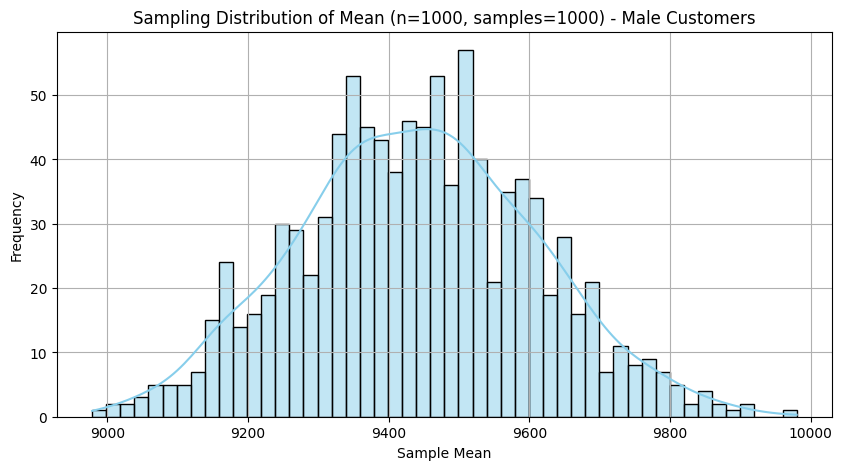

In [23]:
def plot_clt(data, sample_size=1000, num_samples=1000, title='CLT Demo'):
    means = []
    for _ in range(num_samples):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))

    plt.figure(figsize=(10, 5))
    sns.histplot(means, bins=50, kde=True, color='skyblue')
    plt.title(f"Sampling Distribution of Mean (n={sample_size}, samples={num_samples}) - {title}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()


plot_clt(female_sample.values, sample_size=1000, num_samples=1000, title='Female Customers')
plot_clt(male_sample.values, sample_size=1000, num_samples=1000, title='Male Customers')


/tmp/ipython-input-24-260968263.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='Set2')


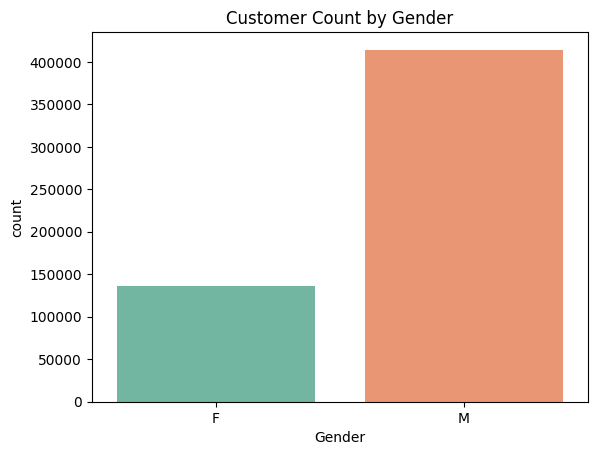

In [24]:
sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Customer Count by Gender')
plt.show()


/tmp/ipython-input-25-3713310473.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Marital_Status', palette='Set1')


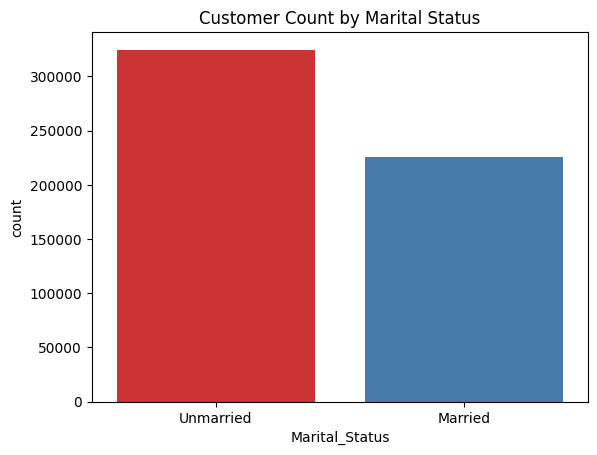

In [25]:
sns.countplot(data=df, x='Marital_Status', palette='Set1')
plt.title('Customer Count by Marital Status')
plt.xticks([0, 1], ['Unmarried', 'Married'])
plt.show()

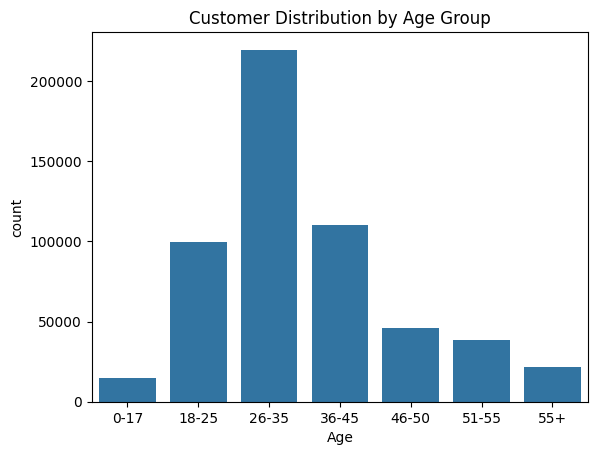

In [26]:
sns.countplot(data=df, x='Age', order=sorted(df['Age'].unique()))
plt.title('Customer Distribution by Age Group')
plt.show()


(b) Bivariate Analysis

/tmp/ipython-input-27-2351330196.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Purchase', palette='Set3')


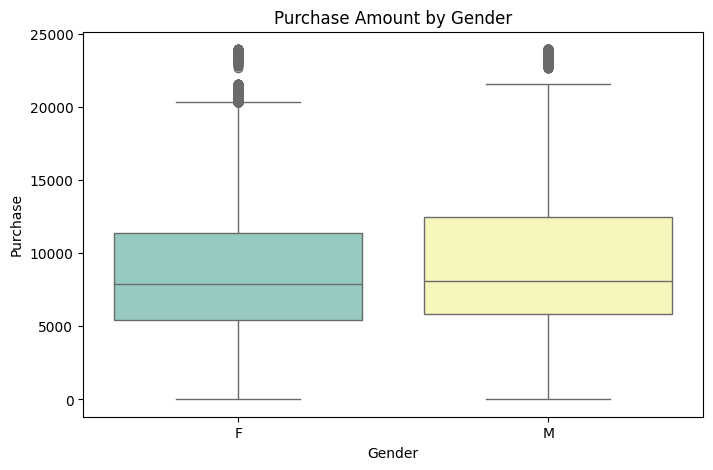

In [27]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Gender', y='Purchase', palette='Set3')
plt.title('Purchase Amount by Gender')
plt.show()


/tmp/ipython-input-28-352999638.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Marital_Status', y='Purchase', palette='Set1')


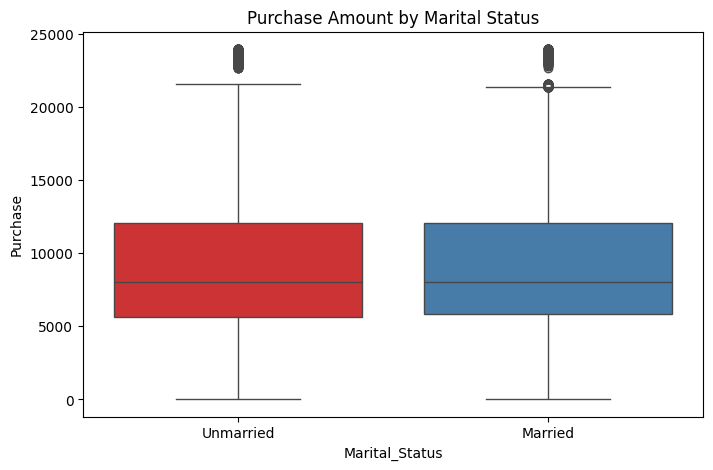

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Marital_Status', y='Purchase', palette='Set1')
plt.title('Purchase Amount by Marital Status')
plt.xticks([0, 1], ['Unmarried', 'Married'])
plt.show()


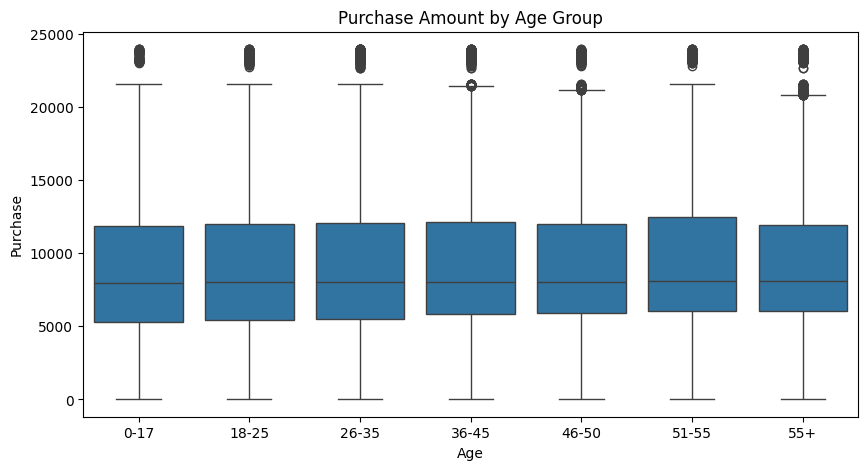

In [29]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Age', y='Purchase', order=sorted(df['Age'].unique()))
plt.title('Purchase Amount by Age Group')
plt.show()


/tmp/ipython-input-30-2561241483.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_avg, x='City_Category', y='Purchase', palette='coolwarm')


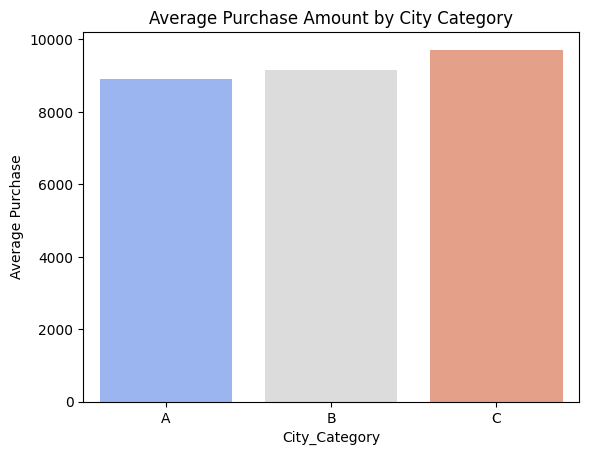

In [30]:
city_avg = df.groupby('City_Category')['Purchase'].mean().reset_index()

sns.barplot(data=city_avg, x='City_Category', y='Purchase', palette='coolwarm')
plt.title('Average Purchase Amount by City Category')
plt.ylabel('Average Purchase')
plt.show()


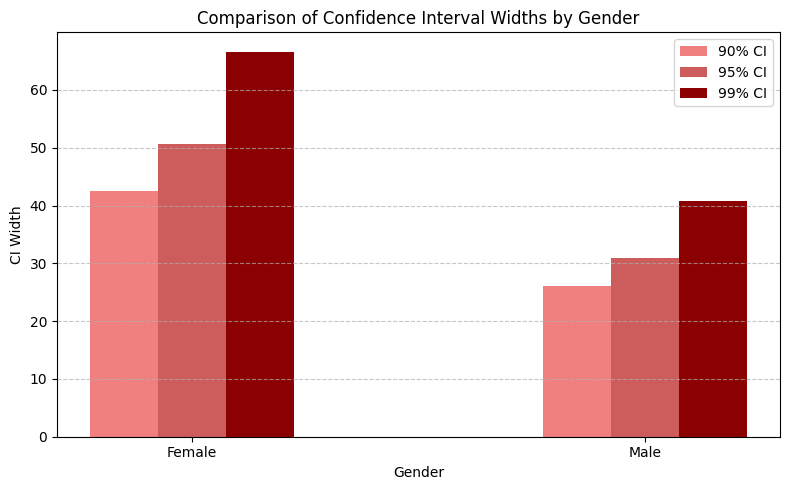

In [31]:
gender_data = {
    'Gender': ['Female', 'Male'],
    '90% CI Width': [42.56, 26.03],
    '95% CI Width': [50.71, 31.01],
    '99% CI Width': [66.64, 40.76]
}

df_gender = pd.DataFrame(gender_data)

plt.figure(figsize=(8, 5))
bar_width = 0.15
x = range(len(df_gender))


plt.bar([p - bar_width for p in x], df_gender['90% CI Width'], width=bar_width, label='90% CI', color='lightcoral')
plt.bar(x, df_gender['95% CI Width'], width=bar_width, label='95% CI', color='indianred')
plt.bar([p + bar_width for p in x], df_gender['99% CI Width'], width=bar_width, label='99% CI', color='darkred')


plt.xticks(ticks=x, labels=df_gender['Gender'])
plt.xlabel("Gender")
plt.ylabel("CI Width")
plt.title("Comparison of Confidence Interval Widths by Gender")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

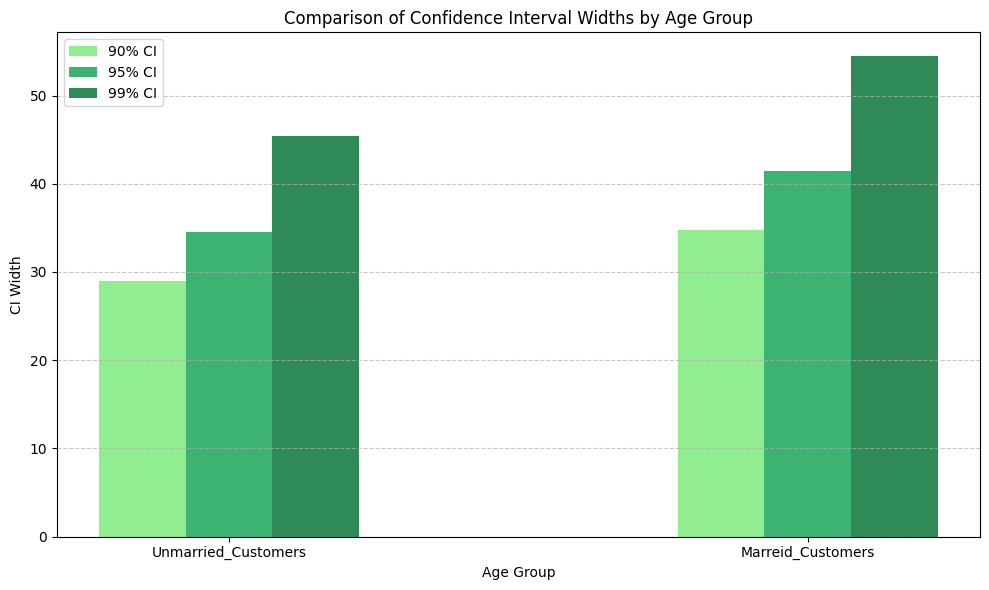

In [32]:
marital_status_data = {
    'Marital_Status': ['Unmarried_Customers', 'Marreid_Customers'],
    '90% CI Width': [29.02, 34.77],
    '95% CI Width': [34.58, 41.43],
    '99% CI Width': [45.45, 54.45]
}

df_widths = pd.DataFrame(marital_status_data)
plt.figure(figsize=(10, 6))
bar_width = 0.15
x = range(len(df_widths))

plt.bar([p - bar_width for p in x], df_widths['90% CI Width'], width=bar_width, label='90% CI', color='lightgreen')
plt.bar(x, df_widths['95% CI Width'], width=bar_width, label='95% CI', color='mediumseagreen')
plt.bar([p + bar_width for p in x], df_widths['99% CI Width'], width=bar_width, label='99% CI', color='seagreen')


plt.xticks(ticks=x, labels=df_widths['Marital_Status'])
plt.xlabel("Age Group")
plt.ylabel("CI Width")
plt.title("Comparison of Confidence Interval Widths by Age Group")
plt.legend()
plt.grid(axis='y', linestyle='--',alpha=0.7)

plt.tight_layout()
plt.show()

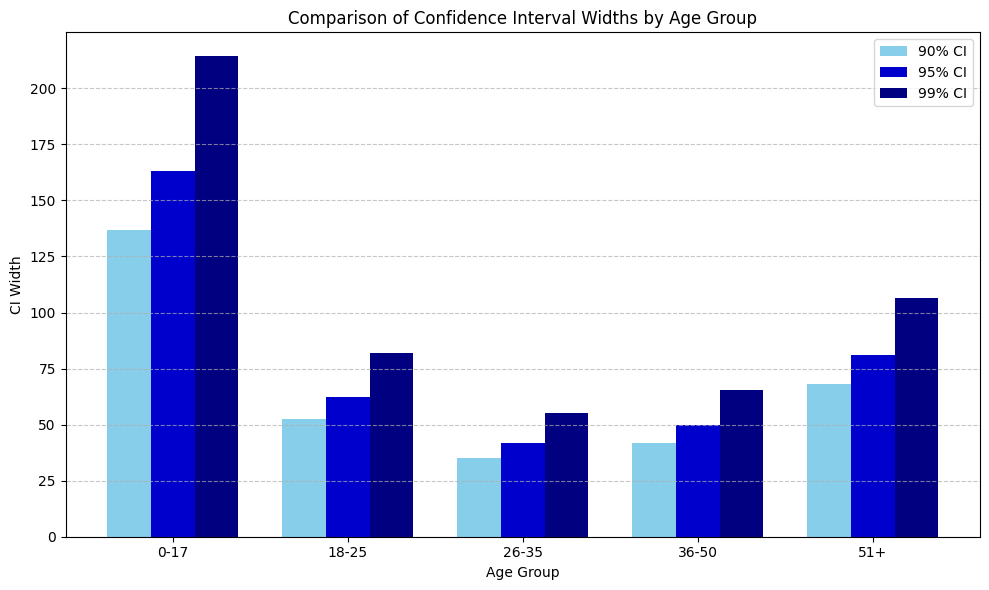

In [33]:
data = {
    'Age Group': ['0-17', '18-25', '26-35', '36-50', '51+'],
    '90% CI Width': [136.82, 52.46, 35.18, 41.74, 67.97],
    '95% CI Width': [163.03, 62.51, 41.91, 49.74, 80.99],
    '99% CI Width': [214.26, 82.15, 55.08, 65.37, 106.44]
}

df_widths = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
bar_width = 0.25
x = range(len(df_widths))

plt.bar([p - bar_width for p in x], df_widths['90% CI Width'], width=bar_width, label='90% CI', color='skyblue')
plt.bar(x, df_widths['95% CI Width'], width=bar_width, label='95% CI', color='mediumblue')
plt.bar([p + bar_width for p in x], df_widths['99% CI Width'], width=bar_width, label='99% CI', color='navy')


plt.xticks(ticks=x, labels=df_widths['Age Group'])
plt.xlabel("Age Group")
plt.ylabel("CI Width")
plt.title("Comparison of Confidence Interval Widths by Age Group")
plt.legend()
plt.grid(axis='y', linestyle='--',alpha=0.7)

plt.tight_layout()
plt.show()


(c) Multivariate Analysis

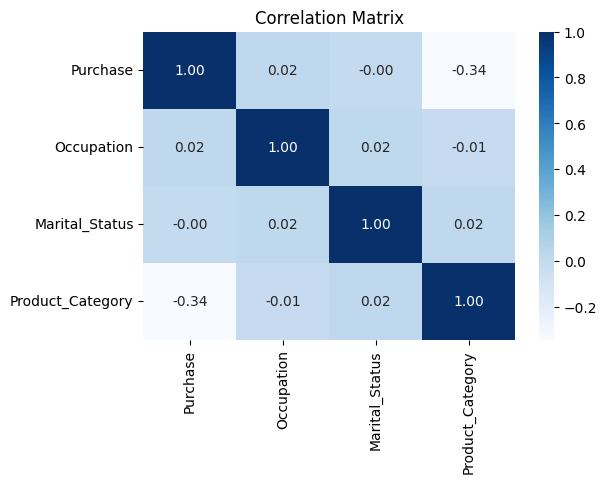

In [34]:
corr = df[['Purchase', 'Occupation', 'Marital_Status', 'Product_Category']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# **Observations**
* women are not spending more per transaction than men.The average purchase amount for males is higher than that of females.

* Boxplots and histograms show that male customers make more high-value purchases.This pattern is also evident in the confidence interval analysis, where male means are consistently higher.

* Using a 95% confidence level:

    Female CI: (8709.21, 8759.92)

    Male CI: (9348.00, 9399.60)

* The distribution of sample means (Central Limit Theorem) shows, sampling distributions are normal-shaped, tighter than the original data. Increasing sample size narrows the confidence interval, improving accuracy.

* No, the confidence intervals for male and female average spending do not overlap. This indicates a statistically significant difference in spending between genders.

* Confidence intervals for married and unmarried customers:

    95% CI for Married: (9240.46, 9281.89)

    95% CI for Unmarried: (9248.62, 9283.20)
* Since the intervals overlap, there's no statistically significant difference in spending based on marital status. A t-test also confirmed that the difference in means is not significant.
* The 26-35 age group has the highest average spend.
  0-17 and 51+ groups have the lowest spending.
  CIs show statistically significant differences across life-stage bins.

* Distribution Observations:
    Purchase values are right-skewed with positive outliers.
    Gender and age significantly influence spending.
    Marital status and occupation show weak correlation with purchase amount.

* Univariate Plots:
    Histograms show skewness.
    Countplots reveal customer mix by demographics.

* Bivariate Plots:
    Boxplots confirm gender and age influence on spend.
    City Category B has the highest average spend (Barplot).



# **Recommendations**
1. Personalized Marketing & Promotions
    * Male Customers: Tend to spend more in fewer transactions.
    * Target them with: Premium products, Bundle deals & Tech or luxury promotions
    * Female Customers: More variation in spending habits.
    * Target them with: Personalized offers based on past purchases, Discounts on daily essentials, Loyalty rewards for frequent visits

2. Inventory & Merchandising Strategy
    * Stock higher-ticket items more in male-dominated shopping channels or regions.
    * Focus on wide variety of everyday items for female customers — especially in urban areas.
3. User Experience & App Personalization
    * Dynamic homepages based on gender:
    * Males → Feature high-value, curated categories.
    * Females → Feature trending, value-for-money, and new arrivals.
        Add options like “shop by budget” to accommodate varying spending behavior of female customers.

4. Predictive Modeling & Segmentation
      * Focus offers for the 26–35 age group, your top spenders.
      * Offer value packs and loyalty points for 51+ customers and families.
      * Don't focus much on marital status — it doesn't affect spending behavior much.
      * Use city category data to adjust promotions by store location.
      * Gender-based segmentation can improve conversion rates and profitability.